In [20]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN",
                "@Fox", "@NewYorkTimes")




In [15]:
# List to hold results
results_list = []

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Loop through all target users
for target in target_terms:
    #variable to hold tweets ago
    tweet_ago = 0
    oldest_tweet = None
    if (tweet_ago < 100):
        # Loop through 10 times
        for x in range(15):

            # Run search around each tweet
            public_tweets = api.search(
                target, count=100, result_type="recent", max_id=oldest_tweet)

            # Loop through all tweets
            for tweet in public_tweets["statuses"]:

                # Use filters to check if user meets conditions
                if (tweet["user"]["followers_count"] < max_followers
                    and tweet["user"]["statuses_count"] > min_tweets
                    and tweet["user"]["statuses_count"] < max_tweets
                    and tweet["user"]["friends_count"] < max_following
                    and tweet["user"]["lang"] == lang
                    and tweet_ago < 100):

                    # Run Vader Analysis on each tweet
                    results = analyzer.polarity_scores(tweet["text"])
                    compound = results["compound"]
                    pos = results["pos"]
                    neu = results["neu"]
                    neg = results["neg"]
                    
                    sentiment = {
                        "User": target,
                        "Compound": compound,
                        "Positive": pos,
                        "Neutral": neu,
                        "Negative": neg,
                        "Tweet_Ago": tweet_ago
                    }
                    results_list.append(sentiment)
                    tweet_ago += 1
                    
            oldest_tweet = tweet["id"] - 1
        

In [18]:
df = pd.DataFrame(results_list)

In [19]:
df.head()

,Compound,Negative,Neutral,Positive,Tweet_Ago,User
0,-0.4215,0.318,0.682,0.000,0,@BBC
1,0.4019,0.000,0.863,0.137,1,@BBC
2,0.0258,0.000,0.879,0.121,2,@BBC
3,-0.5499,0.165,0.835,0.000,3,@BBC
4,0.0000,0.000,1.000,0.000,4,@BBC


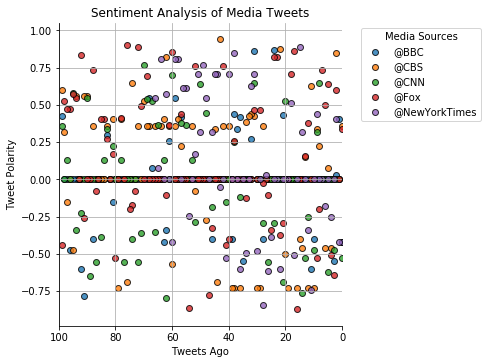

In [54]:

sns.lmplot(x="Tweet_Ago", y="Compound", data=df, hue="User", fit_reg=False,  
           scatter_kws={ 'edgecolor':'black'}, legend=False);

plt.xlim(100,0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(title="Media Sources", bbox_to_anchor=(1.05,1),loc=2)
plt.title("Sentiment Analysis of Media Tweets")
plt.grid()


In [64]:
user_df = df.groupby('User')['Compound'].mean().reset_index()

In [65]:
user_df.columns = ["User","Polarity_mean"]
user_df

,User,Polarity_mean
0,@BBC,-0.002974
1,@CBS,0.050586
2,@CNN,-0.016271
3,@Fox,0.110196
4,@NewYorkTimes,0.095588


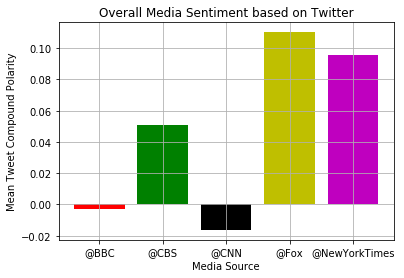

In [79]:
my_colors = 'rgkymcb'

plt.title('Overall Media Sentiment based on Twitter')
plt.ylabel('Mean Tweet Compound Polarity')
plt.xlabel('Media Source')
plt.grid()
plt.bar(user_df['User'],user_df['Polarity_mean'],color=my_colors);